In [1]:
### Importing relevant libraries and importing data

# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import math
from functools import reduce
from math import log
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import argrelmin, argrelmax, find_peaks
from scipy.optimize import curve_fit, minimize
from scipy import signal
import warnings
import scipy as sc
from astropy.io import fits
from astropy.table import Table, Column

hdulist = fits.open('../../Real Data/Healthy_Control_Data/Four_dots_blink_exp.fits')
data = hdulist[0].data

# Getting t data
t = np.linspace(0,500,500)

# Extracting x data and averaging
x = [ [] for i in range(46)]

for i in range(46):

    x[i] = data[1,i,0,:]

x1 = np.array(x)
x_data = np.sum(x1, axis=0)/46

# Extracting y data and averaging
y = [ [] for i in range(46)]

for i in range(46):

    y[i] = data[1,i,1,:]

y1 = np.array(y)
y_data = np.sum(y1, axis=0)/46

# Finding r data
r_data = np.sqrt(x_data**2 + y_data**2)

# Ignoring warnings printed to screen
warnings.filterwarnings("ignore")

In [2]:
### Function to compute takens emedded data for a specified delay and embedding dimension

def takens_embedding(data, delay, dimension):

    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceeds length of data')       # Ensures that delay is not going to be too large such that it is larger than the data length 
    
    embedded_data = np.array([data[0:len(data)-delay*dimension]])

    for i in range(1, dimension):
        embedded_data = np.append(embedded_data, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)

    return embedded_data;

In [3]:
### Function to compute the power specttrum of the phase space

def power_spectrum(data_array,time):

    fouriert_1 = sc.fft.rfft(data_array, len(time))
    fourier_freq = sc.fft.rfftfreq(len(time), d = 1e-3)
    power_spec = np.abs(fouriert_1)**2

    return power_spec, fourier_freq

In [4]:
### Function to compute minimisation to find mid point for linear rise section of the divergence plot 

def minimisation(avlogdiv, n, m2, m1, c1, c2):

    func_to_min = m2*avlogdiv[n] + c2 - (m1*avlogdiv[n]+c1)

    return func_to_min

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - x data')

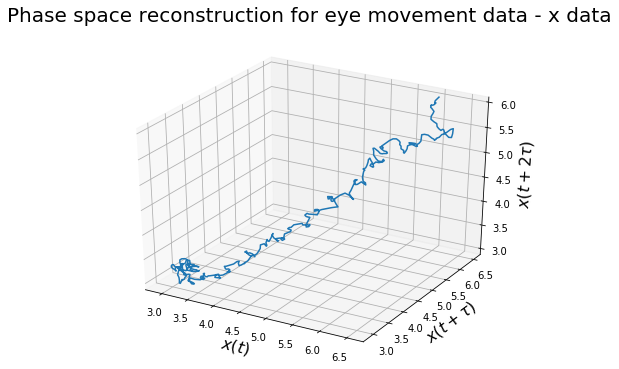

In [5]:
### Performing phase space reconstruction for x data 

embedded_x_final = takens_embedding(x_data, 27, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_x_final[1,:], embedded_x_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - x data', fontsize=20, pad=40)

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - y data')

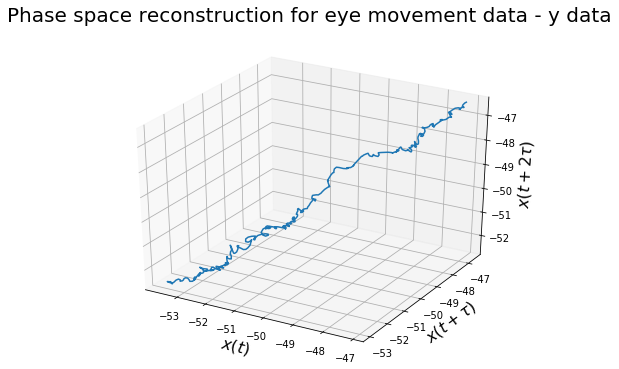

In [6]:
### Performing phase space reconstruction for y data 

embedded_y_final = takens_embedding(y_data, 21, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_y_final[0,:], embedded_y_final[1,:], embedded_y_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - y data', fontsize=20, pad=40)

Text(0.5, 0, '$r(t+2τ)$')

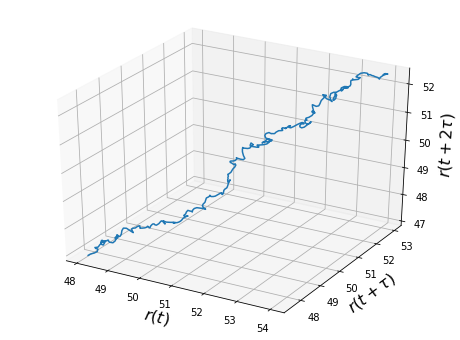

In [7]:
### Performing phase space reconstruction for r data 

embedded_r_final = takens_embedding(r_data, 45, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_r_final[0,:], embedded_r_final[1,:], embedded_r_final[2,:])
ax.set_xlabel('$r(t)$', fontsize=16)
ax.set_ylabel('$r(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$r(t+2\u03C4)$', fontsize=16)

250.0
The period of x data is 0.004 seconds


Text(0, 0.5, 'Power')

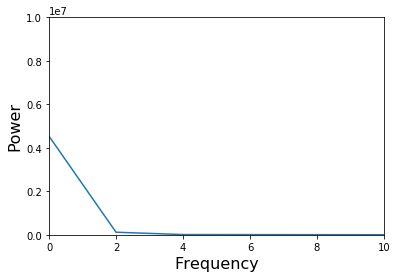

In [8]:
### Power spectrum for x data

# Calculating the power spectrum for x data 
power_spectrum_x = power_spectrum(x_data,t)
freq_x = power_spectrum_x[1]
power_x = power_spectrum_x[0]

# Finding index for the maxima on the graph
mean_freq_x = np.mean(freq_x)
period_x = 1/mean_freq_x

print(mean_freq_x)
print('The period of x data is', + period_x,'seconds')

# Plotting graph and maxima point
plt.plot(freq_x, power_x)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of y data is 0.004 seconds


Text(0, 0.5, 'Power')

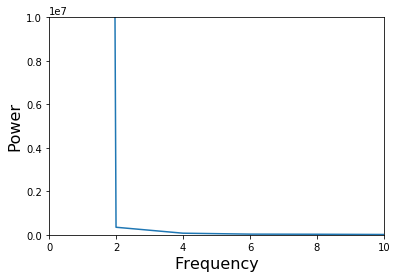

In [9]:
### Power spectrum for y data

power_spectrum_y = power_spectrum(y_data,t)
freq_y = power_spectrum_y[1]
power_y = power_spectrum_y[0]

# Finding index for the maxima on the graph
mean_freq_y = np.mean(freq_y)
period_y = 1/mean_freq_y

print('The period of y data is', + period_y,'seconds')

plt.plot(freq_y, power_y)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of r data is 0.004 seconds


Text(0, 0.5, 'Power')

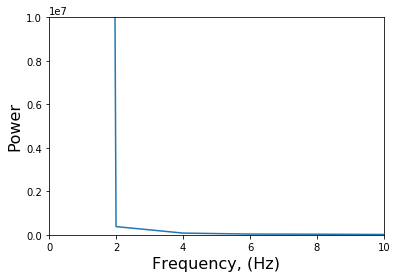

In [10]:
### Power spectrum for r data

power_spectrum_r = power_spectrum(r_data,t)
freq_r = power_spectrum_r[1]
power_r = power_spectrum_r[0]

# Finding index for the maxima on the graph
mean_freq_r = np.mean(freq_r)
period_r = 1/mean_freq_r

print('The period of r data is', + period_r,'seconds')


plt.plot(freq_r, power_r)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency, (Hz)', fontsize=16)
plt.ylabel('Power', fontsize=16)

In [11]:
### Nearest neighbours for x data 

nearest_neighbours_x = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_x_final.transpose())
distances_x, indices_x = nearest_neighbours_x.kneighbors(embedded_x_final.transpose())

print(indices_x[0])

[  0   1   3   2   4   5   7   6   8   9  10  11  12  13  14  15  16  17
  19  18  20  21  27  26  25  28  29  31  30  24  32  33  22  34  38  39
  36  37  23  35  40  41  42  53  52  54  43  51  44  55  67  47  46  66
  56  48  45  50  65  49  68  57  64  58  63  69  61  62  59  60  70  71
  72  75  73  76  77  79  78  74  80  81  82  83  84  93  94  85  86  87
  88  95  92  89  90  91  96  97  98 106 105  99 104 107 100 103 102 108
 101 109 110 114 113 112 111 115 116 117 118 120 119 133 121 124 122 132
 123 134 131 125 130 126 127 129 128 135 136 137 138 142 139 143 141 140
 144 145 151 152 146 157 147 158 153 150 156 154 159 149 148 155 160 161
 162 163 164 165 169 170 166 168 167 171 172 173 174 178 177 179 175 176
 180 184 185 183 181 186 182 188 187 189 190 191 192 193 196 195 194 197
 198 199]


In [12]:
### Nearest neighbours for y data 

nearest_neighbours_y = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_y_final.transpose())
distances_y, indices_y = nearest_neighbours_y.kneighbors(embedded_y_final.transpose())

print(indices_y[0])

[  0   6   1   7   5   2   4   3   8   9  11  10  12  13  14  15  16  17
  18  19  25  26  24  20  27  23  21  22  28  33  32  34  29  31  30  35
  36  37  40  38  39  41  48  42  47  49  46  45  44  43  53  50  52  54
  51  55  56  57  58  67  68  66  62  69  63  59  61  65  60  64  74  70
  75  73  71  76  72  79  77  78  80  86  87  85  81  90  88  89  91  84
  82  83  92  95  93  94  96  97  98 100  99 101 102 103 110 111 109 104
 108 105 106 112 107 113 118 114 117 116 119 115 121 120 122 123 124 131
 125 130 132 126 129 127 128 133 139 138 140 134 141 137 142 135 143 136
 144 145 151 152 146 150 147 153 149 148 162 163 154 161 164 155 165 160
 156 166 159 157 158 167 171 170 168 169 172 173 174 181 182 180 183 176
 175 177 179 184 178 185 186 192 191 187 188 193 190 189 194 195 197 196
 198 199]


In [13]:
### Nearest neighbours for r data 

nearest_neighbours_r = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_r_final.transpose())
distances_r, indices_r = nearest_neighbours_r.kneighbors(embedded_r_final.transpose())

print(indices_r[0])

[  0   1   2   5   4   3   6   8   7   9  10  11  12  15  13  14  16  17
  18  24  23  19  25  22  20  21  26  27  28  29  30  31  32  33  34  40
  41  35  39  42  38  36  37  48  43  49  47  44  46  45  50  51  53  52
  54  62  55  56  63  61  57  64  60  58  65  68  67  66  59  69  74  75
  73  70  71  76  72  77  78  79  80  81  82  83  92  91  93  90  84  94
  87  86  85  89  88  95  96 107 108 102 100  97 101  98  99 106 103 104
 105 109 118 117 119 116 120 115 114 110 121 113 111 122 112 123 127 126
 124 128 125 129 132 131 130 133 134 135 138 137 136 139 140 141 142 143
 144 145 146 147 152 153 148 163 151 164 162 154 149 161 150 165 160 155
 166 159 156 158 157 167 168 171 169 170 172 173 180 181 179 178 182 174
 177 183 176 175 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


-0.00030475715095172975
0.0005035319606184898


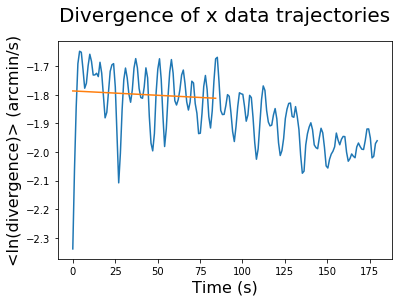

In [15]:
### Divergence for x data 

# Initialising arrays needed for divergence calculation
N = 180
separation_x1 = [ [] for i in range(N)]
logsep_x1 = [ [] for i in range(N)]
lags_x = []
xx_1 = [ [] for i in range(N)]
eps = period_x # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    xx_1[i] = indices_x[i] - i

xx_2 = np.array(xx_1)
times_x = xx_2*1e-3

for i in range(N):

    m_x = 0

    while np.abs(times_x[i][m_x]) < eps and m_x < 199:

        m_x = m_x + 1

    lags_x.append(times_x[i][m_x]) 

lags_x1 = np.array(lags_x)/1e-3
lags_x2 = lags_x1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv1 = np.sqrt((embedded_x_final[0,i+j+lags_x2[i]] - embedded_x_final[0,i+j])**2 + (embedded_x_final[1,i+j+lags_x2[i]] - embedded_x_final[1,i+j])**2 + (embedded_x_final[2,i+j+lags_x2[i]] - embedded_x_final[2,i+j])**2)
        separation_x1[j].append(divv1)


sep_x1 = np.array(separation_x1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_x1[i] = np.log(sep_x1[i])

logsep_x1 = np.array(logsep_x1)

# Calculating the averaged ln(divergence)
av_log_div_x = np.mean(logsep_x1, axis = 1)

# Performing the linear regression calculation
t_regx = t[0:85].reshape(-1,1)
divx_reg = av_log_div_x[0:85].reshape(-1,1)

reg_x = LinearRegression().fit(t_regx, divx_reg)
grad_x = reg_x.coef_.item()
intercept_x = reg_x.intercept_.item()

resx = av_log_div_x[0:85] - (t[0:85]*grad_x + intercept_x)
resx_sq = np.sum(resx**2)
tmean = np.mean(t[0:85])
ttx = np.sum((t[0:85]-tmean)**2)

error_x = np.sqrt((1/83)*(resx_sq/ttx))

plt.plot(t[0:180], av_log_div_x)
plt.plot(t[0:85], t[0:85]*grad_x + intercept_x)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of x data trajectories', fontsize=20, pad=20)


print(grad_x)
print(error_x)


0.0018180365800813429
0.00039626612487887925


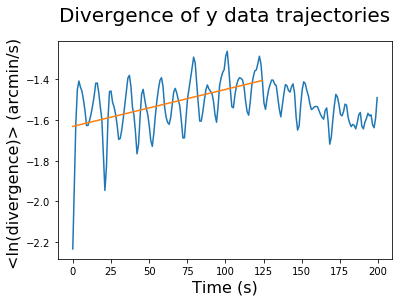

In [ ]:
### Divergence for y data 

# Initialising arrays needed for divergence calculation
N = 200
separation_y1 = [ [] for i in range(N)]
logsep_y1 = [ [] for i in range(N)]
lags_y = []
yy_1 = [ [] for i in range(N)]
eps = period_y # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    yy_1[i] = indices_y[i] - i

yy_2 = np.array(yy_1)
times_y = yy_2*1e-3

for i in range(N):

    m_y = 0

    while np.abs(times_y[i][m_y]) < eps and m_y < 199:

        m_y = m_y + 1

    lags_y.append(times_y[i][m_y]) 

lags_y1 = np.array(lags_y)/1e-3
lags_y2 = lags_y1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_y = np.sqrt((embedded_y_final[0,i+j+lags_y2[i]] - embedded_y_final[0,i+j])**2 + (embedded_y_final[1,i+j+lags_y2[i]] - embedded_y_final[1,i+j])**2 + (embedded_y_final[2,i+j+lags_y2[i]] - embedded_y_final[2,i+j])**2)
        separation_y1[j].append(divv_y)


sep_y1 = np.array(separation_y1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_y1[i] = np.log(sep_y1[i])

logsep_y1 = np.array(logsep_y1)

# Calculating the averaged ln(divergence)
av_log_div_y = np.mean(logsep_y1, axis = 1)

# Performing the linear regression calculation
t_regy = t[0:125].reshape(-1,1)
divy_reg = av_log_div_y[0:125].reshape(-1,1)

reg_y = LinearRegression().fit(t_regy, divy_reg)
grad_y = reg_y.coef_.item()
intercept_y = reg_y.intercept_.item()

resy = av_log_div_y[0:125] - (t[0:125]*grad_y + intercept_y)
resy_sq = np.sum(resy**2)
tmean_y = np.mean(t[0:125])
tty = np.sum((t[0:125]-tmean_y)**2)

error_y = np.sqrt((1/73)*(resy_sq/tty))

plt.plot(t[0:200], av_log_div_y)
plt.plot(t[0:125], t[0:125]*grad_y + intercept_y)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s) ', fontsize=16)
plt.title('Divergence of y data trajectories', fontsize=20, pad=20)

print(grad_y)
print(error_y)


0.0020547577372012206
0.0005799607004864504


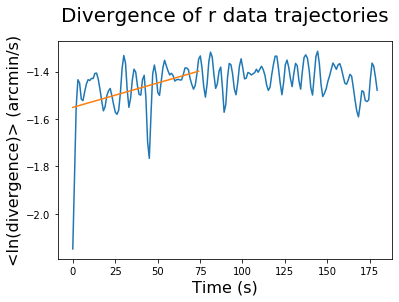

In [ ]:
### Divergence for r data 

# Initialising arrays needed for divergence calculation
N = 180
separation_r1 = [ [] for i in range(N)]
logsep_r1 = [ [] for i in range(N)]
lags_r = []
rr_1 = [ [] for i in range(N)]
eps = period_r # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    rr_1[i] = indices_r[i] - i

rr_2 = np.array(rr_1)
times_r = rr_2*1e-3

for i in range(N):

    m_r = 0

    while np.abs(times_r[i][m_r]) < eps and m_r < 199:

        m_r = m_r + 1

    lags_r.append(times_r[i][m_r]) 

lags_r1 = np.array(lags_r)/1e-3
lags_r2 = lags_r1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_r = np.sqrt((embedded_r_final[0,i+j+lags_r2[i]] - embedded_r_final[0,i+j])**2 + (embedded_r_final[1,i+j+lags_r2[i]] - embedded_r_final[1,i+j])**2 + (embedded_r_final[2,i+j+lags_r2[i]] - embedded_r_final[2,i+j])**2)
        separation_r1[j].append(divv_r)


sep_r1 = np.array(separation_r1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_r1[i] = np.log(sep_r1[i])

logsep_r1 = np.array(logsep_r1)

# Calculating the averaged ln(divergence)
av_log_div_r = np.mean(logsep_r1, axis = 1)

# Performing the linear regression calculation
t_regr = t[0:75].reshape(-1,1)
divr_reg = av_log_div_r[0:75].reshape(-1,1)

reg_r = LinearRegression().fit(t_regr, divr_reg)
grad_r = reg_r.coef_.item()
intercept_r = reg_r.intercept_.item()

resr = av_log_div_r[0:75] - (t[0:75]*grad_r + intercept_r)
resr_sq = np.sum(resr**2)
tmean_r = np.mean(t[0:75])
ttr = np.sum((t[0:75]-tmean_r)**2)

error_r = np.sqrt((1/73)*(resr_sq/ttr))

plt.plot(t[0:180], av_log_div_r)
plt.plot(t[0:75], t[0:75]*grad_r + intercept_r)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of r data trajectories', fontsize=20, pad=20)

print(grad_r)
print(error_r)